# 1. connect to kaggle and getting data

https://www.geeksforgeeks.org/python-os-path-join-method/

image dir is : ./image
image path is : ./image/how_to_download_data_from_kaggle.png
current path is : /Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Traditional_Model


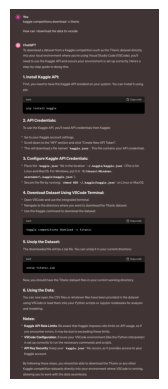

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'how_to_download_data_from_kaggle.png')

print("image dir is :", image_dir)
print("image path is :", image_path)        
print("current path is :", os.getcwd())                 # how to get current path 

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

1. First, you need to have the Kaggle API installed on your system. You can install it using pip:

In [3]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


2. API Credentials: To use the Kaggle API, you'll need API credentials from Kaggle:

    2.1 Go to your Kaggle account settings.

    2.2 Scroll down to the "API" section and click "Create New API Token".
    
    2.3 This will download a file named kaggle.json. This file contains your API credentials.

3. Configure Kaggle API Credentials:
Place the kaggle.json file in the location ~/.kaggle/kaggle.json (This is for Linux and MacOS). (You had created this folder in the past)

image path is : ./image/kaggle_folder_path.png


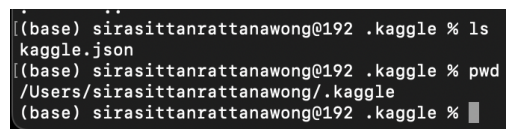

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'kaggle_folder_path.png')

print("image path is :", image_path)
# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

Secure the file by running: " chmod 600 ~/.kaggle/kaggle.json " on Linux or MacOS. (in terminal can be both local or vscode)

4. Download Dataset Using VSCode Terminal:

    4.1 Open VSCode and use the integrated terminal.

    4.2 Navigate to the directory where you want to download the Titanic dataset.
    
    4.3 Use the Kaggle command to download the dataset:

    " kaggle competitions download -c titanic "

5. Unzip the Dataset: The downloaded file will be a zip file. You can unzip it in your current directory: (vscode terminal)

    " unzip titanic.zip "

# 2. EDA and clean data 

## 2.1 visualize dataframe

In [5]:
import pandas as pd
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


check datatype : https://www.tutorialspoint.com/how-to-check-the-data-type-in-pandas-dataframe

In [7]:
print(df_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


count nan value : https://saturncloud.io/blog/how-to-count-nan-values-in-a-pandas-dataframe-column/

In [8]:
def count_nan_value(df) :
    return df.isna().sum()


In [9]:
train_nan_count = count_nan_value(df_train)
print(train_nan_count)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
test_nan_count = count_nan_value(df_test)
print(test_nan_count)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2.2 handle nan value

you need to drop column with missing target in train dataset (there is no missing target in this case though)

In [11]:
df_train2 = df_train.dropna(subset=['Survived'])


drop column cabin (too much nan value) : https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [12]:
df_train_drop_Cabin = df_train2.drop('Cabin', axis=1)
df_test_drop_Cabin = df_test.drop('Cabin', axis=1)

counting occurence : https://saturncloud.io/blog/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas/

In [13]:
df_train_drop_Cabin['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df_train_drop_Cabin['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

drop nan value : https://saturncloud.io/blog/python-pandas-how-to-remove-nan-and-inf-values/

adding title   : https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/

mean of age is : 29.69911764705882
median of age is: 28.0


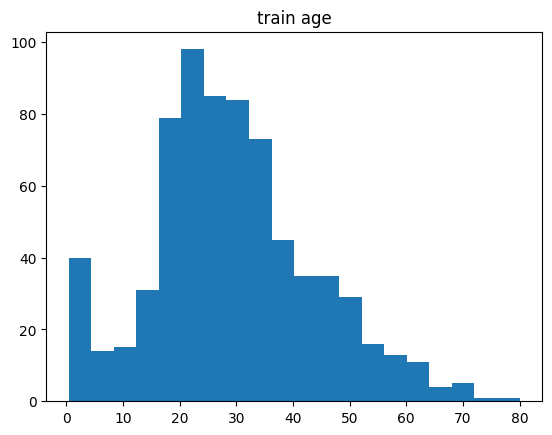

In [15]:
print("mean of age is :", df_train_drop_Cabin["Age"].mean())
print("median of age is:", df_train_drop_Cabin["Age"].median())
plt.hist(df_train_drop_Cabin['Age'].dropna(), bins=20)     #bins is optional  https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/
plt.title('train age')
plt.show() 

mean of fare is : 32.204207968574636
median of fare is: 14.4542
mode of fare is: 8.05


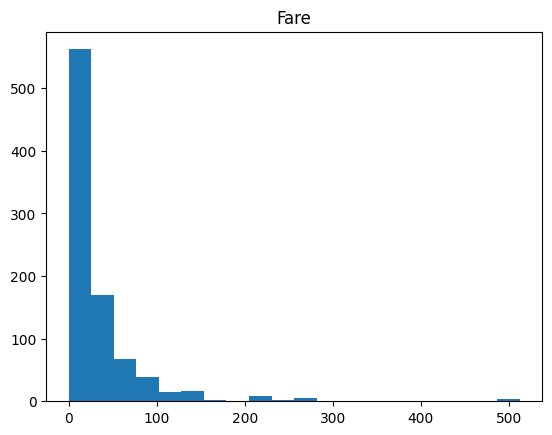

In [16]:
print("mean of fare is :", df_train_drop_Cabin["Fare"].mean())
print("median of fare is:", df_train_drop_Cabin["Fare"].median())
print("mode of fare is:", df_train_drop_Cabin["Fare"].mode()[0])

plt.hist(df_train_drop_Cabin['Fare'].dropna(), bins=20)
plt.title("Fare")
plt.show() 

sub plots : https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

set space : https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

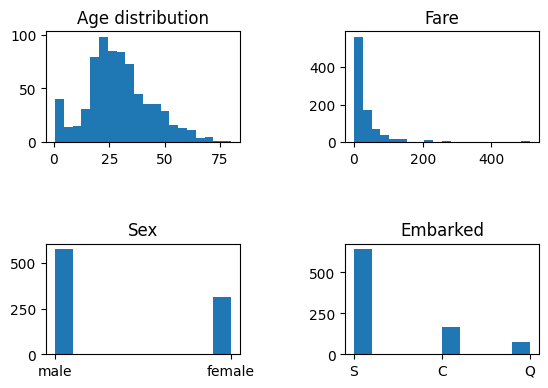

In [17]:
import math 
import numpy as np 
  
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 2) 
  
axis[0, 0].hist(df_train_drop_Cabin['Age'].dropna(), bins=20)
axis[0, 0].set_title("Age distribution") 
  
axis[0, 1].hist(df_train_drop_Cabin['Fare'].dropna(), bins=20)
axis[0, 1].set_title("Fare") 
  
axis[1, 0].hist(df_train_drop_Cabin['Sex'].dropna())
axis[1, 0].set_title("Sex") 
  
axis[1, 1].hist(df_train_drop_Cabin['Embarked'].dropna()) 
axis[1, 1].set_title("Embarked") 
  
# Combine all the operations and display 
figure.tight_layout(pad=4.0)
plt.show() 

fill nan value

In [18]:
# Count the occurrences of each value in the 'Embarked' column
embarked_counts_train = df_train_drop_Cabin['Embarked'].value_counts()
embarked_counts_test = df_test_drop_Cabin['Embarked'].value_counts()

# Print the counts
print(embarked_counts_train)
print()
print(embarked_counts_test)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


fill nan value : https://saturncloud.io/blog/how-to-replace-nan-values-with-the-average-of-columns-in-pandas-dataframe/

(fill with avg and mode has a little different syntax)

In [19]:
# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
train_age_mean = df_train_drop_Cabin['Age'].mean()

# 2. embarked 
train_embarked_mode  = df_train_drop_Cabin['Embarked'].mode()[0]


# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_train_drop_Cabin_fill_nan = df_train_drop_Cabin.copy()
df_train_drop_Cabin_fill_nan['Age'] = df_train_drop_Cabin['Age'].fillna(train_age_mean)
df_train_drop_Cabin_fill_nan['Embarked'] = df_train_drop_Cabin['Embarked'].fillna(train_embarked_mode)


In [20]:
# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
test_age_mean = df_test_drop_Cabin['Age'].mean()

# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin.copy()
df_test_drop_Cabin_fill_nan['Age'] = df_test_drop_Cabin_fill_nan['Age'].fillna(test_age_mean)

# 2. fared
test_fared_mean = df_test_drop_Cabin_fill_nan['Fare'].mean()
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin_fill_nan.copy()
df_test_drop_Cabin_fill_nan['Fare'] = df_test_drop_Cabin_fill_nan['Fare'].fillna(test_fared_mean)

df_test_drop_Cabin_fill_nan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


plot value count : https://www.statology.org/pandas-plot-value-counts/

<class 'numpy.ndarray'>
['S' 'C' 'Q']
['S', 'C', 'Q']


<Axes: xlabel='Embarked'>

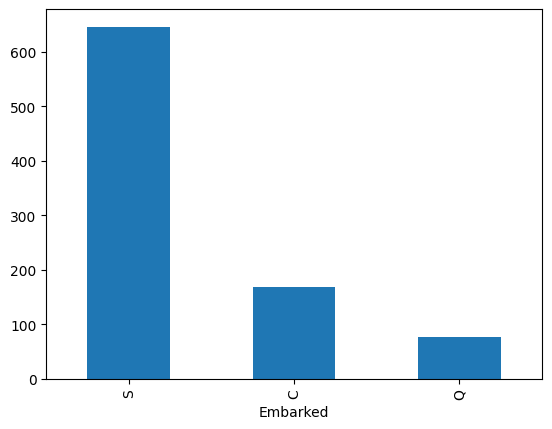

In [21]:
print(type(df_train_drop_Cabin_fill_nan["Embarked"].unique()))
print(df_train_drop_Cabin_fill_nan["Embarked"].unique())
print(list(df_train_drop_Cabin_fill_nan["Embarked"].unique()))
df_train_drop_Cabin_fill_nan.Embarked.value_counts().plot(kind='bar')

## 2.3 feature engineering

extract title from name

In [22]:
df_train_drop_Cabin_fill_nan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train_list = df_train_drop_Cabin_fill_nan['Name'].tolist()

In [24]:
train_list_of_title = []
for i in train_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    train_list_of_title.append(title)
print(train_list_of_title)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

replace a column name with a list : https://stackoverflow.com/questions/44608524/pandas-replace-column-values-with-a-list

In [25]:
df_train_feature_engineering = df_train_drop_Cabin_fill_nan.copy()
df_train_feature_engineering['Name'] = train_list_of_title
df_train_feature_engineering.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Name'>

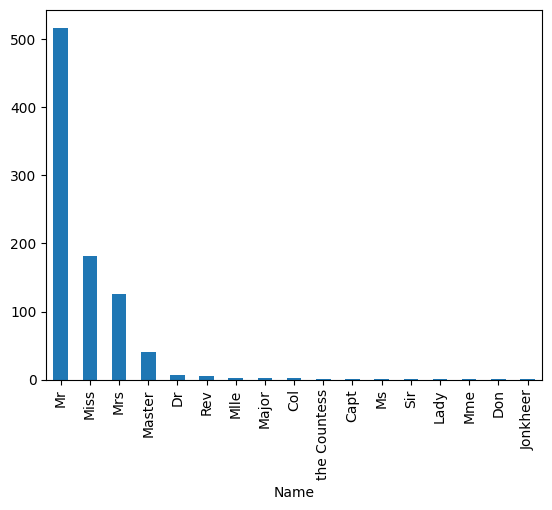

In [26]:
df_train_feature_engineering.Name.value_counts().plot(kind='bar')

In [27]:
list_of_train_feature_engineering = df_train_feature_engineering['Name'].tolist()
print(list_of_train_feature_engineering)
replace_list_of_train = []
for i in list_of_train_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_train.append(i)
    else :
        replace_list_of_train.append('etc')
print(replace_list_of_train)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

In [28]:
df_train_feature_engineering['Name'] = replace_list_of_train
df_train_feature_engineering.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Name'>

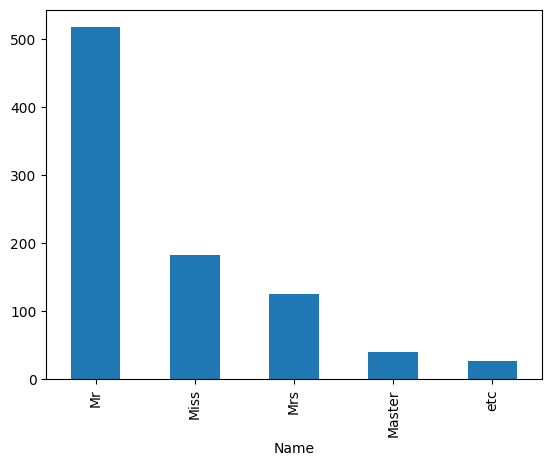

In [29]:
df_train_feature_engineering.Name.value_counts().plot(kind='bar')

In [30]:
test_list = df_test_drop_Cabin_fill_nan['Name'].tolist()

test_list_of_title = []
for i in test_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    test_list_of_title.append(title)
print(test_list_of_title)

['Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Ms', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Col', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Re

In [31]:
df_test_feature_engineering = df_test_drop_Cabin_fill_nan.copy()
df_test_feature_engineering['Name'] = test_list_of_title
df_test_feature_engineering.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,S


<Axes: xlabel='Name'>

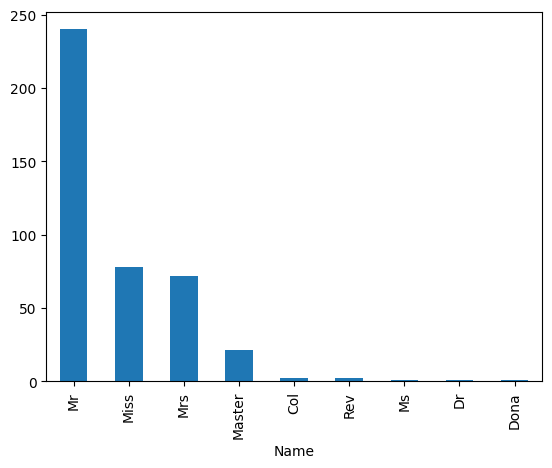

In [32]:
df_test_feature_engineering.Name.value_counts().plot(kind='bar')

In [33]:
list_of_test_feature_engineering = df_test_feature_engineering['Name'].tolist()
print(list_of_test_feature_engineering)
replace_list_of_test = []
for i in list_of_test_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_test.append(i)
    else :
        replace_list_of_test.append('etc')
print(replace_list_of_test)

['Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Ms', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Col', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Re

In [34]:
df_test_feature_engineering['Name'] = replace_list_of_test
df_test_feature_engineering.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,S


<Axes: xlabel='Name'>

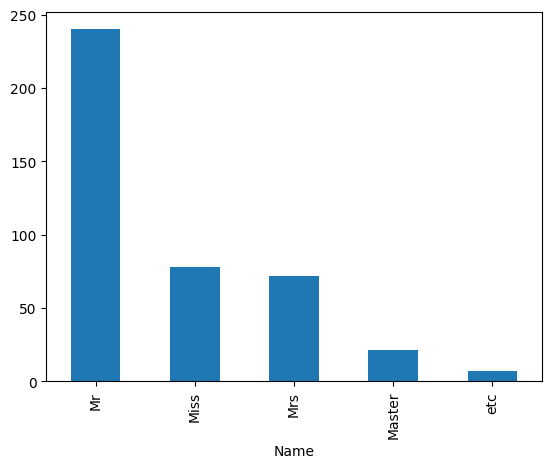

In [35]:
df_test_feature_engineering.Name.value_counts().plot(kind='bar')

## 2.4 drop column

In [36]:
drop_cols = ['PassengerId', 'Ticket']

df_train_drop_unrelated = df_train_feature_engineering.drop(drop_cols, axis=1)
df_test_drop_unrelated = df_test_feature_engineering.drop(drop_cols, axis=1)

In [37]:
df_train_drop_unrelated.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


## 2.5 encoding

https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

ordinal data -> Ordinal data is a qualitative data type that classifies variables in a ranked order.

nominal data -> Nominal data is a qualitative type of data used to classify and label variables, and has no specific order or hierarchy. Variables like name, eye color and nationality are examples of nominal data.

In general, if we deal with nominal data, we prefer using one-hot encoding over label encoding

### 2.5.1 label encoding

with assigned value : https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

In [38]:
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()

#encoded_list = ['Sex', 'Name']

In [39]:
#for i in encoded_list :
#    encoder.fit(df_train_drop_unrelated[i])
#    train_values = encoder.transform(df_train_drop_unrelated[i])
#    df_train_drop_unrelated[i] = train_values
#    print(train_values[:10])

In [40]:
#df_train_drop_unrelated.head()

In [41]:
#for i in encoded_list :
#    encoder.fit(df_test_drop_unrelated[i])
#    test_values = encoder.transform(df_test_drop_unrelated[i])
#    df_test_drop_unrelated[i] = test_values
#    print(test_values[:10])

In [42]:
#df_test_drop_unrelated.head()

In [43]:
list(df_test_drop_unrelated["Embarked"].unique())
type(list(df_test_drop_unrelated["Embarked"].unique()))

list

### 2.5.2 one-hot encoding

In fact, male and Mr are redundance however i will not remove it because i want to show you an example of one-hotencoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
def onehot_encoding(df, cols) :
    encoder = OneHotEncoder()
    df_copy = df.copy()
    for i in cols:
        encoded_reshaped = np.array(df_copy[i]).reshape(-1, 1)
        encoded_values = encoder.fit_transform(encoded_reshaped)  
        cols = list(df_copy[i].unique())                                                         #you need to initiate cols because .sort() return none
        cols.sort()  
        features =  pd.DataFrame(encoded_values.toarray().astype(int), columns = cols)
        drop_cols = i
        df_return = pd.concat([features, df_copy.drop(drop_cols, axis=1)], axis=1)
        df_copy = df_return          # we need to change df_copy everytime we iterate the list of columns
    return df_return







#chatgpt
'''
def onehot_encoding(df, cols):
    encoder = OneHotEncoder()
    for col in cols:
        # Encode the column
        encoded_reshaped = df[col].values.reshape(-1, 1)
        encoded_values = encoder.fit_transform(encoded_reshaped).toarray()

        # Create a DataFrame for the encoded values
        encoded_columns = [f"{col}_{category}" for category in encoder.categories_[0]]
        encoded_df = pd.DataFrame(encoded_values, columns=encoded_columns, index=df.index)

        # Sort the encoded columns
        encoded_df = encoded_df[sorted(encoded_df.columns)]

        # Concatenate and drop the original column
        df = pd.concat([df.drop(col, axis=1), encoded_df], axis=1)

    return df

'''
        

'\ndef onehot_encoding(df, cols):\n    encoder = OneHotEncoder()\n    for col in cols:\n        # Encode the column\n        encoded_reshaped = df[col].values.reshape(-1, 1)\n        encoded_values = encoder.fit_transform(encoded_reshaped).toarray()\n\n        # Create a DataFrame for the encoded values\n        encoded_columns = [f"{col}_{category}" for category in encoder.categories_[0]]\n        encoded_df = pd.DataFrame(encoded_values, columns=encoded_columns, index=df.index)\n\n        # Sort the encoded columns\n        encoded_df = encoded_df[sorted(encoded_df.columns)]\n\n        # Concatenate and drop the original column\n        df = pd.concat([df.drop(col, axis=1), encoded_df], axis=1)\n\n    return df\n\n'

In [46]:
df_train_completed = onehot_encoding(df_train_drop_unrelated, ['Embarked', 'Name', 'Sex'])
df_train_completed.head()

,female,male,Master,Miss,Mr,Mrs,etc,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,0,0,0,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,1,0,0,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,0,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,0,0,0,1,0,3,35.0,0,0,8.0500


In [47]:
df_test_completed = onehot_encoding(df_test_drop_unrelated, ['Embarked', 'Name', 'Sex'])
df_test_completed.head()

,female,male,Master,Miss,Mr,Mrs,etc,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,1,0,3,34.5,0,0,7.8292
1,1,0,0,0,0,1,0,0,0,1,3,47.0,1,0,7.0000
2,0,1,0,0,1,0,0,0,1,0,2,62.0,0,0,9.6875
3,0,1,0,0,1,0,0,0,0,1,3,27.0,0,0,8.6625
4,1,0,0,0,0,1,0,0,0,1,3,22.0,1,1,12.2875


In [48]:
train_nan_count = df_train_completed.isna().sum()
test_nan_count = df_test_completed.isna().sum()
print(train_nan_count)
print()

print(test_nan_count)

female      0
male        0
Master      0
Miss        0
Mr          0
Mrs         0
etc         0
C           0
Q           0
S           0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

female    0
male      0
Master    0
Miss      0
Mr        0
Mrs       0
etc       0
C         0
Q         0
S         0
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [49]:
print(df_train_completed.dtypes)
print(df_test_completed.dtypes)

female        int64
male          int64
Master        int64
Miss          int64
Mr            int64
Mrs           int64
etc           int64
C             int64
Q             int64
S             int64
Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object
female      int64
male        int64
Master      int64
Miss        int64
Mr          int64
Mrs         int64
etc         int64
C           int64
Q           int64
S           int64
Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object


## 2.6 features transformation

There are so many transformation method : https://www.geeksforgeeks.org/feature-transformation-techniques-in-machine-learning/

### 2.6.1 optional you can use StandardScaler to transform input (X features) it might provide better result (you need to check again if there are any mistakes by get the result tomorrow)
if you don't want to use this part, just comment everything in this section

### 2.6.2 log transformation

In [50]:
import math
from math import log

# Calculating logarithmic values for the specified column
df_train_completed['Fare'] = np.log(df_train_completed['Fare']+1)
df_test_completed['Fare'] = np.log(df_test_completed['Fare']+1)

## 2.7 correlation matrix

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

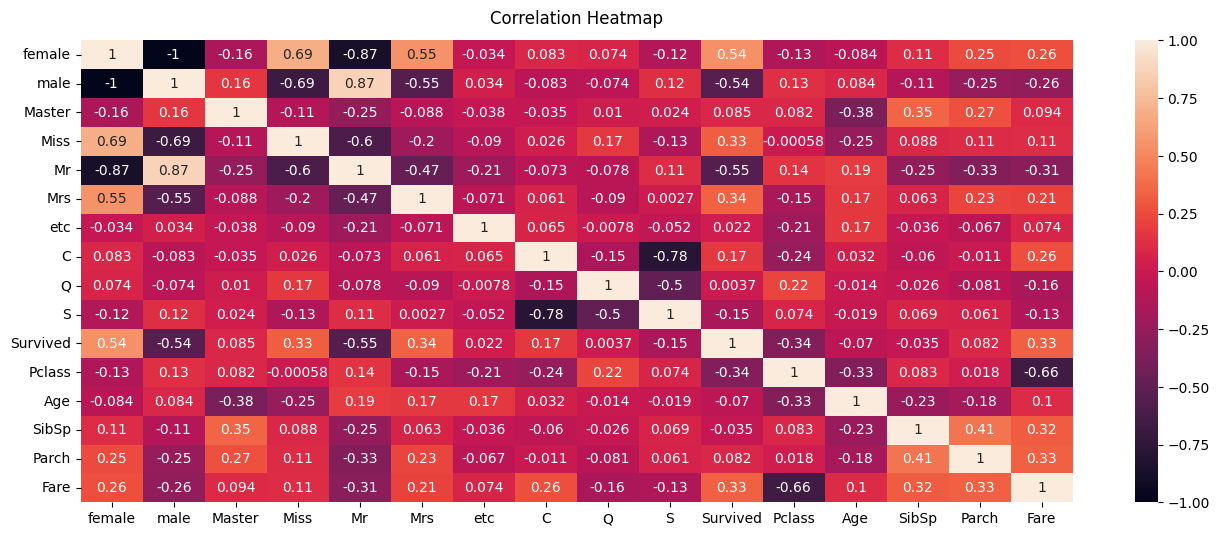

In [51]:
import seaborn as sns

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_train_completed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 2.8 split train eval test

select all column except one ->  https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-in-pandas ,     https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe

stratify -> https://www.jcchouinard.com/train-test-split/

if data is not classification, we should classify it first. then convert back

In [52]:
import pandas as pd
import torch

col = "Survived"
train_features_X = df_train_completed.loc[:, df_train_completed.columns != col]
train_features_X.head()


,female,male,Master,Miss,Mr,Mrs,etc,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,0,1,3,22.0,1,0,2.110213
1,1,0,0,0,0,1,0,1,0,0,1,38.0,1,0,4.280593
2,1,0,0,1,0,0,0,0,0,1,3,26.0,0,0,2.188856
3,1,0,0,0,0,1,0,0,0,1,1,35.0,1,0,3.990834
4,0,1,0,0,1,0,0,0,0,1,3,35.0,0,0,2.202765


In [53]:
train_features_y = df_train_completed[col]
train_features_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and evaluation sets
X_train, X_val, y_train, y_val = train_test_split(train_features_X, train_features_y, test_size=0.15, random_state=42, stratify=train_features_y)
X_train.head()

,female,male,Master,Miss,Mr,Mrs,etc,C,Q,S,Pclass,Age,SibSp,Parch,Fare
400,0,1,0,0,1,0,0,0,0,1,3,39.000000,0,0,2.188856
122,0,1,0,0,1,0,0,1,0,0,2,32.500000,1,0,3.436268
358,1,0,0,1,0,0,0,0,1,0,3,29.699118,0,0,2.183711
626,0,1,0,0,0,0,1,0,1,0,2,57.000000,0,0,2.591516
874,1,0,0,0,0,1,0,1,0,0,2,28.000000,1,0,3.218876


In [55]:
X_test = df_test_completed
X_test.head()

,female,male,Master,Miss,Mr,Mrs,etc,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,0,0,1,0,3,34.5,0,0,2.178064
1,1,0,0,0,0,1,0,0,0,1,3,47.0,1,0,2.079442
2,0,1,0,0,1,0,0,0,1,0,2,62.0,0,0,2.369075
3,0,1,0,0,1,0,0,0,0,1,3,27.0,0,0,2.268252
4,1,0,0,0,0,1,0,0,0,1,3,22.0,1,1,2.586824


In [56]:
y_train.value_counts()

Survived
0    466
1    291
Name: count, dtype: int64

In [57]:
y_val.value_counts()

Survived
0    83
1    51
Name: count, dtype: int64

## 2.8.2 try to drop column again (by experiment)

In [58]:
#X_train

In [59]:
#drop_cols = ['female', 'Master', 'Miss', 'Mr', 'Mrs', 'etc', 'SibSp', 'Parch', 'Q']

#X_train = X_train.drop(drop_cols, axis=1)
#X_val = X_val.drop(drop_cols, axis=1)
#X_test = X_test.drop(drop_cols, axis=1)

## 2.9 tensor data for neural network model

Pytorch’s neural network layers are not compatible with Numpy arrays.

we need to convert our data to be tensor format

pandas to tensor -> https://saturncloud.io/blog/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor/

In [ ]:
tensor_train_X = torch.tensor(X_train.values)
tensor_train_y = torch.tensor(y_train.values)
tensor_eval_X = torch.tensor(X_val.values)
tensor_eval_y = torch.tensor(y_val.values)

tensor_test = torch.tensor(df_test_completed.values)

print(type(tensor_train_X))
print("train data shape is  :", tensor_train_X.shape)
print("train label shape is :", tensor_train_y.shape)
print("eval data shape is   :", tensor_eval_X.shape)
print("eval label shape is  :", tensor_eval_y.shape)
print("test data shape is   :", tensor_test.shape)

In [ ]:
def print_tensor_details(tensor):
    print("Shape           :", tensor.shape)
    print("Data Type       :", tensor.dtype)
    print("Device          :", tensor.device)
    print("Requires Gradient :", tensor.requires_grad)
    print()


print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

# 3. model simple neural network (from basic knowledge)

there are 2 methods 
1. 1 out_features then round
2. 2 out_features

In [ ]:
input_shape = tensor_train_X.shape[1]
input_shape

## 3.1  one out feature -> same as 02 pytorch

### 3.1.1 setup device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

### 3.1.2 initialize model and send it to device

https://discuss.pytorch.org/t/what-is-manual-seed/5939/4

In [ ]:
from torch import nn

torch.manual_seed(42)           #set manual seed

model_0 = nn.Sequential(nn.Linear(in_features=input_shape, out_features=15),              
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=15),
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=15),
                        nn.ReLU(),
                        nn.Linear(in_features=15, out_features=1))

model_0.to(device)
model_0

### 3.1.3 loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCELoss = no sigmoid built-in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.001)

### 3.1.4 create accuracy function (optional)

In [ ]:
def accuracy_fn(y_true, y_pred):
    y_true_squeezed = y_true.squeeze()  # Remove singleton dimensions, if any
    y_pred_squeezed = y_pred.squeeze()  # Remove singleton dimensions, if any

    if len(y_true_squeezed) != len(y_pred_squeezed):
        raise ValueError("Length of y_true and y_pred must be the same.")

    correct = torch.eq(y_true_squeezed, y_pred_squeezed).sum().item()
    #print("Number of correct predictions:", correct)
    
    acc = (correct / len(y_pred_squeezed)) * 100

    return acc

### 3.1.5 type cast from float64 to float32, send the data to device and check the input data detail

In [ ]:

tensor_train_X = tensor_train_X.type(torch.float32).to(device) 
tensor_eval_X = tensor_eval_X.type(torch.float32).to(device)
tensor_train_y = tensor_train_y.type(torch.float32).to(device)
tensor_eval_y = tensor_eval_y.type(torch.float32).to(device)
tensor_test = tensor_test.type(torch.float32).to(device)


In [ ]:
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

#### try using the untrained model

In [ ]:
y_logits = model_0(tensor_train_X)[:5]
# we need to type cast because of this error from below code. 
# Cannot convert a MPS Tensor to float64 dtype as the MPS framework doesn't support float64. Please use float32 instead.
y_logits

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)   # -> sigmoid activation function # 1 / ( 1 + e^(-x) )
y_pred_probs

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_pred = torch.round(y_pred_probs)
print(type(y_pred))
print(y_pred.shape)
y_pred

### 3.1.6 train the model 

In [ ]:


#set the number of epochs
epochs = 1000

#build training and evaluating loop
for epoch in range(epochs) :
    
    ### training
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(tensor_train_X).squeeze() #squeeze to remove extra 1 dim
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. calculate the loss
    train_loss = loss_fn(y_logits, tensor_train_y)
    train_acc = accuracy_fn(y_true = tensor_train_y, y_pred = y_pred)
    
    #3. optimizer
    optimizer.zero_grad()
    
    #4. loss backward
    train_loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    
    
    #evaluation
    model_0.eval()
    with torch.inference_mode() :
        #1. forward pass
        eval_logits = model_0(tensor_eval_X).squeeze()
        eval_pred = torch.round(torch.sigmoid(eval_logits))
        
        #2. calculate loss/accuracy
        eval_loss = loss_fn(eval_logits, tensor_eval_y)
        eval_acc = accuracy_fn(y_true = tensor_eval_y, y_pred = eval_pred)
    
    if(epoch == 0) :
        print("tensor_train_X shape is :", tensor_train_X.shape)
        print("tensor_train_y shape is :", tensor_train_y.shape)
        print("y_logits       shape is :", y_logits.shape)
        print("y_pred         shape is :", y_pred.shape)
        print("eval_logits   shape is :", eval_logits.shape)
        print("eval_pred      shape is :", eval_pred.shape)
        print("y_logits       dtype is :", y_logits.dtype)
        print("tensor_train_y dtype is :", tensor_train_y.dtype)
        print()
    if(epoch % 50 == 0) :
        print(f"Epoch: {epoch} | train Loss: {train_loss:.5f}, train Accuracy: {train_acc:.2f}% | eval loss: {eval_loss:.5f}, eval acc: {eval_acc:.5f}")

In [ ]:
with torch.no_grad():  # Gradients are not tracked in this block
    eval_predicted = torch.round(torch.sigmoid(model_0(tensor_eval_X)))
    eval_predicted = eval_predicted.to("cpu")
    
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))


### 3.1.7 send the result

In [ ]:
#detail in  #### try using the untrained model
y_pred_labels = torch.round(torch.sigmoid(model_0(tensor_test)))
y_pred_labels[:20] 

In [ ]:
# we need to use PassengerID
df_sent1 = df_test_drop_Cabin_fill_nan

In [ ]:
df_sent1.head()

In [ ]:
# Assuming y_pred_labels is a PyTorch tensor with the predicted labels
# and dfsent1 is the given DataFrame with the passenger information.

# First, we will convert the tensor of predictions to a list of integers
# The tensor is detached from the current graph, moved to CPU, converted to numpy, and then to a list
predicted_labels = y_pred_labels.detach().cpu().numpy().astype(int).flatten().tolist()

# Extract the PassengerId column from dfsent1
passenger_ids = df_sent1['PassengerId'].tolist()

# Create the final DataFrame using the lists above
df_final = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_labels
})

df_final  # Display the first few rows of the final DataFrame

In [ ]:
# Assuming df_final is your final DataFrame with 'PassengerId' and 'Survived' columns
df_final.to_csv('./submit_file/submission.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission.csv -m "02file model"

Score: 0.64354 -> without StandardScaler

Score: 0.66028 -> with StandardScaler

## 3.2 two out features -> same as 03 pytorch

### 3.2.1 setup the device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

### 3.2.2 initialize the model and send to device

In [ ]:
# we need not to flatten (our data are not image like 28*28)
class model_titanic(nn.Module) :
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) :
        
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
            
        )
        
    def forward(self, x) :
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)           #set manual seed

#setup model 
model_0 = model_titanic(
    input_shape=input_shape,   
    hidden_units=15,
    output_shape=2
)

model_0.to(device)
model_0

### 3.2.3 loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### 3.2.4 create accuracy function (optional)

In [ ]:
def accuracy_fn(y_true, y_pred):
    y_true_squeezed = y_true.squeeze()  # Remove singleton dimensions, if any
    y_pred_squeezed = y_pred.squeeze()  # Remove singleton dimensions, if any

    if len(y_true_squeezed) != len(y_pred_squeezed):
        raise ValueError("Length of y_true and y_pred must be the same.")

    correct = torch.eq(y_true_squeezed, y_pred_squeezed).sum().item()
    #print("Number of correct predictions:", correct)
    
    acc = (correct / len(y_pred_squeezed)) * 100

    return acc

### 3.2.5 type cast from float64 to float32 and send the data to device and check the input data detail

In [ ]:
tensor_train_X = tensor_train_X.type(torch.float32).to(device) 
tensor_eval_X = tensor_eval_X.type(torch.float32).to(device)
tensor_test = tensor_test.type(torch.float32).to(device)

tensor_train_y = tensor_train_y.type(torch.int64)               # when we use classification we need to convert from tensor back to int otherwise it will cause an error when calculate loss function.
tensor_eval_y = tensor_eval_y.type(torch.int64)

In [ ]:
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

### 3.2.6 train the model

In [ ]:
# import tqdm
from tqdm.auto import tqdm
#set epochs
epochs = 100

#create training loop
for epoch in (range(epochs)) :

    model_0.train()
    
    #1. forward pass
    y_logits = model_0(tensor_train_X)  
    y_pred = y_logits.argmax(dim=1)
    
    #2. calculate loss
    train_loss = loss_fn(y_logits, tensor_train_y)
    train_acc = accuracy_fn(y_true = tensor_train_y, y_pred=y_pred)
    
    #3. optimizer zero grad
    optimizer.zero_grad()
        
    #4. loss backward
    train_loss.backward()
        
    #5. optimizer step
    optimizer.step()
    
    if(epoch == 0) :
        print("tensor_train_X shape is :", tensor_train_X.shape)
        print("tensor_train_y shape is :", tensor_train_y.shape)
        print("y_logits       shape is :", y_logits.shape)
        print("y_pred         shape is :", y_pred.shape)
        print("y_logits       dtype is :", y_logits.dtype)
        print("tensor_train_y dtype is :", tensor_train_y.dtype)
        print("train loss is           :", train_loss)
        print("train acc is            :", train_acc)
        print()
    
    ### evaluation
    model_0.eval()
    with torch.inference_mode() :
        
        #1. forward pass
        eval_logits = model_0(tensor_eval_X)
        eval_pred = eval_logits.argmax(dim=1)
            
        #2. calculate loss
        eval_loss = loss_fn(eval_logits, tensor_eval_y)
            
        #3. calculate accuracy
        eval_acc = accuracy_fn(y_true=tensor_eval_y, y_pred=eval_pred)               #from train part we got tensor after forward method we will use argmax position.
        
        if(epoch == 0) :
            print("tensor_eval_X shape is :", tensor_eval_X.shape)
            print("tensor_eval_y shape is :", tensor_eval_y.shape)
            print("eval_logits   shape is :", eval_logits.shape)
            print("eval_pred     shape is :", eval_pred.shape)
            print()
        
    
        
    if(epoch % 10 == 0) :
        ## Print out what's happening
        print(f"Epoch: {epoch}\n-------")
        print(f"\nTrain loss: {train_loss:.5f} | eval loss: {eval_loss:.5f}, eval acc: {eval_acc:.2f}%\n")

### 3.2.7 send the result

In [ ]:
y_logits = model_0(tensor_test)
y_logits[:5]

In [ ]:
y_pred = y_logits.argmax(dim=1)
y_pred[:20]

In [ ]:
df_sent2 = df_test_drop_Cabin_fill_nan
df_sent2

In [ ]:
# Assuming y_pred_labels is a PyTorch tensor with the predicted labels
# and dfsent1 is the given DataFrame with the passenger information.

# First, we will convert the tensor of predictions to a list of integers
# The tensor is detached from the current graph, moved to CPU, converted to numpy, and then to a list
predicted_labels = y_pred.detach().cpu().numpy().astype(int).flatten().tolist()

# Extract the PassengerId column from dfsent1
passenger_ids = df_sent2['PassengerId'].tolist()

# Create the final DataFrame using the lists above
df_final2 = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_labels
})

df_final2  # Display the first few rows of the final DataFrame

In [ ]:
# Assuming df_final2 is your final DataFrame with 'PassengerId' and 'Survived' columns
df_final2.to_csv('./submit_file/submission2.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission2.csv -m "03file model"

Score: 0.66028 -> without StandardScaler

Score: 0.34210 -> with StandardScaler

# 4. basic ML algorithm (most traditional models are scikit-learn not pytorch)

## 4.1 linear regression model (it is not used for classification) (not completely understand the algorithm of gradient descent yet)

example code : https://github.com/pvateekul/2110446_DSDE_2023s2/blob/main/code/Week03_ML/2_Linear_Regression_v2.ipynb

How does it find the best line (one of the methods is gradient descent): https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

source code for sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html -> https://github.com/scikit-learn/scikit-learn/blob/9e38cd00d/sklearn/linear_model/_base.py#L434

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'linear_regression.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

## 4.2 logistic regression model (not completely understand the algorithm of gradient descent yet)

How does the model work and how does it find the best line : https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

source code from sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html -> https://github.com/scikit-learn/scikit-learn/blob/9e38cd00d/sklearn/linear_model/_logistic.py#L803

https://ai.plainenglish.io/logistic-regression-with-pytorch-8c3899712fa0

1. if type of inputs of loss function are different, it might cause error like "The Kernel crashed ..." it need not to be memory crash
2. check model and input if you suspect any input or model error

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'logistic_regression.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

### 4.2.1 build your own

1. set up the device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

In [ ]:
from torch import nn

torch.manual_seed(42)           #set manual seed

2. initialize the model and send it to device

In [ ]:
# Codeblock 10
class Logistic_Regression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer0 = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer0(x)
        x = self.sigmoid(x)
        return x



torch.manual_seed(42)               #set the seed

# Codeblock 11
model = Logistic_Regression(num_features=input_shape).to(device)

3. loss function and optimizer

loss function : https://stackoverflow.com/questions/66906884/how-is-pytorchs-class-bcewithlogitsloss-exactly-implemented

loss function : https://www.bualabs.com/archives/1945/what-is-cross-entropy-loss-logistic-regression-log-loss-loss-function-ep-3/

There are many types of optimizer ex. torch.optim.AdamW. You can change it to one of these : https://pytorch.org/docs/stable/optim.html

How to choose optimizer : https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e

In [ ]:
# Codeblock 13
LEARNING_RATE = 0.001
EPOCHS = 4000

# Codeblock 14
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

4. create accuracy function (optional)

In [ ]:
# Codeblock 15
def calculate_accuracy(preds, actuals):
    
    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)
        
    return accuracy

5. typecast an send the data to device (check data dtype and data device)

we need to convert the datatype back to float32 in this case

In [ ]:
tensor_train_y = tensor_train_y.type(torch.float32).to(device)
tensor_eval_y = tensor_eval_y.type(torch.float32).to(device)
print_tensor_details(tensor_train_X)
print_tensor_details(tensor_train_y)
print_tensor_details(tensor_eval_X)
print_tensor_details(tensor_eval_y)
print_tensor_details(tensor_test)

6. train the model

In [ ]:
# Codeblock 16
train_losses = []
test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = model(tensor_train_X).squeeze()
    train_loss  = loss_function(train_preds, tensor_train_y)
    
    # Predicting test data #b
    with torch.no_grad():
        test_preds = model(tensor_eval_X).squeeze()
        test_loss  = loss_function(test_preds, tensor_eval_y)
        
    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, tensor_train_y)
    test_acc  = calculate_accuracy(test_preds, tensor_eval_y)
    
    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()
    
    # Store training history #f
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())
    
    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')

7. send the model

In [ ]:
y_test_pred_bf = model(tensor_test)
y_test_pred_bf = y_test_pred_bf .to("cpu")
y_test_pred_detached = y_test_pred_bf.detach()  # Detach the tensor from the computation graph
y_test_pred = y_test_pred_detached.round().int().squeeze().numpy()  # Now you can convert it to a NumPy array
y_test_pred

In [ ]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent4 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final4 = pd.DataFrame({
    'PassengerId': df_sent4['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final4.head())

# Save the DataFrame to a CSV file
df_final4.to_csv('./submit_file/submission_logistic_regression.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_logistic_regression.csv -m "logistic_regression.csv model"

Score: 0.69138 -> without StandardScaler

Score: 0.66507 -> with StandardScaler

### 4.2.2 sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
eval_predicted = model.predict(X_val)
eval_predicted

In [ ]:
from sklearn.metrics import accuracy_score
val_score=accuracy_score(y_val, eval_predicted)
val_score

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted, digits=4))

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent4_2 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final4_2 = pd.DataFrame({
    'PassengerId': df_sent4_2['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final4_2.head())

# Save the DataFrame to a CSV file
df_final4_2.to_csv('./submit_file/submission_logistic_regression_sklearn.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_logistic_regression_sklearn.csv -m "logistic_regression.csv model"

<span style="font-size:30px; color: orange;">**from 4.3 we use dataframe as an input not tensor anymore so we need not to check device of data input and model**</span>




## 4.3 SVM model (similar to logistic regression but can handle multi-class)

code of using the model : https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

detail of the model : https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/svm/_classes.py

There is a little difference between SVC and Linear SVC, here is an example for SVC model : https://github.com/pvateekul/2110446_DSDE_2023s2/blob/main/code/Week03_ML/6_Support_Vector_Machine_v2.ipynb

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'SVM.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

In [ ]:
X_train.head()

### 4.3.1 linear SVC

In [ ]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
eval_predicted= support.predict(X_val)
score=accuracy_score(y_val, eval_predicted)
print("Your Model Accuracy is", score)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = support.predict(X_test)
y_test_pred

send method1

In [ ]:
df_sent5 = df_test_drop_Cabin_fill_nan
df_sent5['survived'] = y_test_pred
df_sent5[['PassengerId', 'survived']] \
    .to_csv('./submit_file/submission_svm.csv', index=False)

send method2

In [ ]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent5 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final5 = pd.DataFrame({
    'PassengerId': df_sent5['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final5.head())

# Save the DataFrame to a CSV file
df_final5.to_csv('./submit_file/submission_svm.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_svm.csv -m "svm model"

Score: 0.65789 -> without StandardScaler

Score: 0.77272 -> with StandardScaler

### 4.3.2 SVC

detail : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Suggest Parameters

    - C: 1
    - kernel: rbf
    - gamma: auto

In [ ]:
from sklearn.svm import SVC

In [ ]:
import time
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "auto"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
  random_state=0
)
svm.fit(X_train, y_train)

In [ ]:
eval_predicted= svm.predict(X_val)
score=accuracy_score(y_val, eval_predicted)
print("Your Model Accuracy is", score)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = svm.predict(X_test)

In [ ]:
# Assuming df_test_drop_Cabin_fill_nan contains the 'PassengerId' and has the same order as df_test_completed
df_sent5_2 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame using the PassengerId from df_sent5 and the predicted labels
df_final5_2 = pd.DataFrame({
    'PassengerId': df_sent5_2['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final5_2.head())

# Save the DataFrame to a CSV file
df_final5_2.to_csv('./submit_file/submission_svm_svc.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_svm_svc.csv -m "svm model"

## 4.4 decision tree (the most completed version as of now (29/1/24))

**<span style="color: orange;">deep dive to the model</span>**

    1. How does the model work : slide aj (page25-55) https://drive.google.com/file/d/1FJZe0iSn-EsOqWO1HnmkBYb7T-znoPSk/view?usp=sharing 

    2. How does the model work : https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
        - How does the model select an attribute to create tree : finding an attribute that returns the highest information gain and the smallest entropy. : https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

    3. source code of the model (26/1/24) : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html ,    https://github.com/scikit-learn/scikit-learn/blob/9e38cd00d/sklearn/tree/_classes.py#L698    
    
    4. importance parameters
        4.1 max_depth -> too depth can cause overfitting (leaves ~ 2^n)
        4.2 min_samples_leaf -> too less can cause overfitting (only a few samples)

**<span style="color: orange;">Type of Decision tree </span>**

1. Decision tree classifier -> classification model  (in this case) (can be used with both binary classification and multi classification)

2. Decision tree regressor  -> regression model

https://medium.com/equinox-blog/decision-tree-101-scikit-learn-afed3bf414a2 

**<span style="color: orange;">How to read : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html </span>**

    1. hyper param -> parameter of the model
        1.1 criterion  -> criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
        1.2 splitter   -> splitter{“best”, “random”}, default=”best”
        1.3 max_depth  -> max_depthint, default=None
        1.4 min_samples_splitint or float, default=2
        1.5 , 1.6 , 1.7 ...
    2. attribute (varaibles) -> ex. importance = clf.feature_importances_
    3. method (function) -> ex. .fit(), .predict()



In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'decision_tree_params.png')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=3)                                   

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
eval_predicted = clf.predict(X_val)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = clf.predict(X_test)
print(y_test_pred)

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent6 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final6 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final6.head())

# Save the DataFrame to a CSV file
df_final6.to_csv('./submit_file/submission_decision_tree.csv', index=False)

In [ ]:
type(df_sent6['PassengerId']), type(y_test_pred)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_decision_tree.csv -m "decision tree model"

Score: 0.72009 -> without StandardScaler

Score: 0.69138 -> with StandardScaler

### 4.4.2 extra features

1. sklearn.tree.plot_tree : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html    ->    https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
2. .feature_importances

- attributes -> properties, fields (variables)   (clf.feature_importances_)
- method     -> function ex. .fit(), .predict(), .transform()
- stand alone function ex. plot_tree

In [ ]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [ ]:
importances = clf.feature_importances_
importances


### 4.4.3 extra get confidence level

search -> how to get probabilty of decision tree sklearn

https://stackoverflow.com/questions/47251594/scikit-learn-decision-tree-probability-of-prediction-being-a-or-b

In [ ]:
# Predict the response for validation dataset
eval_probabilities = clf.predict_proba(X_val)
eval_probabilities

In [ ]:
len(y_test_pred)

## 4.5 random forest

**<span style="color: orange;">many decision trees combined</span>**

you can adjust parameters when you intiate the mdoel : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

the importance parameters (excluding from decision tree):
- n_estimators

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'random_forest.jpg')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=20, max_depth=6, min_samples_leaf=3)
rf.fit(X_train, y_train)

In [ ]:
eval_predicted = rf.predict(X_val)

accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = rf.predict(X_test)
print(y_test_pred)

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent7 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final7 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final7.head())

# Save the DataFrame to a CSV file
df_final7.to_csv('./submit_file/random_forest.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_random_forest.csv -m "random forest model"

Score: 0.74880 -> without StandardScaler

Score: 0.74880 -> with StandardScaler

## 4.6 KNN model (K-Nearest Neighbors) (deep learning) this also has an example of using sc = StandardScaler() (but I didn't use)

**<span style="color: orange;">importance parameter</span>**

    - n_neighbors -> finds the k closest data points (neighbors)



**<span style="color: orange;">importance parameter</span>** : slide aj(pattern recog) (page 71-102) -> https://drive.google.com/file/d/1JxQoBr-HOGIBelPlAJZEsPkmKiMOlxA3/view?usp=sharing

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Relative path to the image directory
# './' refers to the current directory
image_dir = os.path.join('.', 'image')

# Construct the path to the image using os.path.join
image_path = os.path.join(image_dir, 'KNN_model.png')

# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    raise ValueError("Failed to load the image. The file may be corrupted or in an unsupported format.")

plt.axis('off')  # Command for hiding the axis
plt.imshow(image)
plt.show()

https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

eval_predicted = classifier.predict(X_val)
accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent8 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final8 = pd.DataFrame({
    'PassengerId': df_sent8['PassengerId'],  # PassengerId from df_sent8
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final8.head())

# Save the DataFrame to a CSV file
df_final8.to_csv('./submit_file/submission_knn.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_knn.csv -m "KNN model"

Score: 0.66267 -> without StandardScaler

Score: 0.75358 -> with StandardScaler

In [ ]:
print(5)

## 4.7 grid search (used for hyper parameters tuning) can be used with many models ex. SVC, random forest, KNN model

grid search is normally used with sklearn only not pytorch, tensorflow

you can only use gridsearch with models built using/compatible with sklearn

if you want to use with pytorch or tensorflow you need to wrap it before using

How does grid search work : https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/

Gridsearch document : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

I use random forest as an example

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
rf = RandomForestClassifier(random_state = 2020)

# without gridsearch
# rf = RandomForestClassifier(n_estimators=20, max_depth=6, min_samples_leaf=3)

combination of hyperparameters
1. criterion = ['gini', 'entropy']
2. max_dept = [2,3,6]
3. min_sample_leaf = [2,5,10]
4. n_estimators = [100,200]

So,36 combination. If you use various model, you need to change keys from 1,2,3,4

hyperparams : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**<span style="color: orange;">don't forget to use cv=StratifiedKFold</span>**

In [ ]:
# defining parameter range
param_grid = {'criterion':['gini','entropy'],
              'max_depth': [2,3,6],
              'min_samples_leaf':[2,5,10],
              'n_estimators':[100,200]}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
eval_predicted = CV_rfc.predict(X_val)
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = CV_rfc.predict(X_test)
y_test_pred

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent8 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final8 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Save the DataFrame to a CSV file
df_final8.to_csv('./submit_file/random_forest_grid_search.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/submission_random_forest_grid_search.csv -m "random forest model"

## 4.8 gridsearch with SVC 

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(
  random_state=0
)
param_grid = {'kernel':['linear', 'poly', 'rbf'],
              'cache_size': [2048,4096],
             }

In [ ]:
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
CV_svm.fit(X_train, y_train)

In [ ]:
CV_svm.best_params_

In [ ]:
eval_predicted = CV_svm.predict(X_val)
print(classification_report(y_val,eval_predicted))

In [ ]:
y_test_pred = CV_svm.predict(X_test)
y_test_pred

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent9 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final9 = pd.DataFrame({
    'PassengerId': df_sent6['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Save the DataFrame to a CSV file
df_final9.to_csv('./submit_file/svm_grid_search.csv', index=False)

send : when you are at (base) sirasittanrattanawong@192 Traditional_Model %     ---->      kaggle competitions submit -c titanic -f ./submit_file/svm_grid_search.csv -m "random forest model"

## 4.9 lightGBM (can be run in colab but not locally maybe because of version)

search command : lightgbm binary classification

link : https://www.geeksforgeeks.org/binary-classification-using-lightgbm/

link : https://forecastegy.com/posts/lightgbm-binary-classification-python/

search command : LGBMClassifier parameters

link : https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [1]:
!pip3 install lightgbm

In [59]:

import lightgbm as lgbm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from lightgbm import LGBMClassifier
model = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=20,
    num_leaves=5,
    max_depth=3,
    n_jobs=-1,
    verbose=2,  # Enable verbose logging to see detailed training output
    callbacks = [lgbm.log_evaluation(period=5)]

)

model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

In [ ]:
# Use df_test_drop_Cabin_fill_nan for PassengerId information
df_sent10 = df_test_drop_Cabin_fill_nan

# Create the final DataFrame for submission
df_final10 = pd.DataFrame({
    'PassengerId': df_sent10['PassengerId'],  # PassengerId from df_sent6
    'Survived': y_test_pred
})

# Display the first few rows of the final DataFrame
print(df_final10.head())

# Save the DataFrame to a CSV file
df_final10.to_csv('./submit_file/lightgbm_forest.csv', index=False)

kaggle competitions submit -c titanic -f ./submit_file/lightgbm.csv -m "random forest model"

Score: 0.78708

# 5. pipeline

## 5.1 Original step (24 april 2024, this may have changed later.)

In [ ]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [ ]:
df_train2 = df_train.dropna(subset=['Survived'])
df_train_drop_Cabin = df_train2.drop('Cabin', axis=1)
df_test_drop_Cabin = df_test.drop('Cabin', axis=1)

In [ ]:
# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
train_age_mean = df_train_drop_Cabin['Age'].mean()

# 2. embarked 
train_embarked_mode  = df_train_drop_Cabin['Embarked'].mode()[0]


# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_train_drop_Cabin_fill_nan = df_train_drop_Cabin.copy()
df_train_drop_Cabin_fill_nan['Age'] = df_train_drop_Cabin['Age'].fillna(train_age_mean)
df_train_drop_Cabin_fill_nan['Embarked'] = df_train_drop_Cabin['Embarked'].fillna(train_embarked_mode)





# 1. age
# Calculate the mean of the 'Age' column (excluding NaN values)
test_age_mean = df_test_drop_Cabin['Age'].mean()

# Create a new DataFrame by filling NaN values in the 'Age' column with the mean
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin.copy()
df_test_drop_Cabin_fill_nan['Age'] = df_test_drop_Cabin_fill_nan['Age'].fillna(test_age_mean)

# 2. fared
test_fared_mean = df_test_drop_Cabin_fill_nan['Fare'].mean()
df_test_drop_Cabin_fill_nan = df_test_drop_Cabin_fill_nan.copy()
df_test_drop_Cabin_fill_nan['Fare'] = df_test_drop_Cabin_fill_nan['Fare'].fillna(test_fared_mean)

df_test_drop_Cabin_fill_nan.head()

In [ ]:
train_list = df_train_drop_Cabin_fill_nan['Name'].tolist()
train_list_of_title = []
for i in train_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    train_list_of_title.append(title)

df_train_feature_engineering = df_train_drop_Cabin_fill_nan.copy()
df_train_feature_engineering['Name'] = train_list_of_title

list_of_train_feature_engineering = df_train_feature_engineering['Name'].tolist()
replace_list_of_train = []
for i in list_of_train_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_train.append(i)
    else :
        replace_list_of_train.append('etc')
df_train_feature_engineering['Name'] = replace_list_of_train




test_list = df_test_drop_Cabin_fill_nan['Name'].tolist()
test_list_of_title = []
for i in test_list :
    title_with_name = i.split(',')
    title = title_with_name[1].split('.')[0].strip()
    test_list_of_title.append(title)
df_test_feature_engineering = df_test_drop_Cabin_fill_nan.copy()
df_test_feature_engineering['Name'] = test_list_of_title

list_of_test_feature_engineering = df_test_feature_engineering['Name'].tolist()
replace_list_of_test = []
for i in list_of_test_feature_engineering :
    if i in ['Mr', 'Mrs', 'Miss', 'Master'] :
        replace_list_of_test.append(i)
    else :
        replace_list_of_test.append('etc')
df_test_feature_engineering['Name'] = replace_list_of_test






In [ ]:
drop_cols = ['PassengerId', 'Ticket']

df_train_drop_unrelated = df_train_feature_engineering.drop(drop_cols, axis=1)
df_test_drop_unrelated = df_test_feature_engineering.drop(drop_cols, axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def onehot_encoding(df, cols) :
    encoder = OneHotEncoder()
    df_copy = df.copy()
    for i in cols:
        encoded_reshaped = np.array(df_copy[i]).reshape(-1, 1)
        encoded_values = encoder.fit_transform(encoded_reshaped)  
        cols = list(df_copy[i].unique())                                                         #you need to initiate cols because .sort() return none
        cols.sort()  
        features =  pd.DataFrame(encoded_values.toarray().astype(int), columns = cols)
        drop_cols = i
        df_return = pd.concat([features, df_copy.drop(drop_cols, axis=1)], axis=1)
        df_copy = df_return          # we need to change df_copy everytime we iterate the list of columns
    return df_return

df_train_completed = onehot_encoding(df_train_drop_unrelated, ['Embarked', 'Name', 'Sex'])
df_test_completed = onehot_encoding(df_test_drop_unrelated, ['Embarked', 'Name', 'Sex'])


In [ ]:
import math
from math import log

# Calculating logarithmic values for the specified column
df_train_completed['Fare'] = np.log(df_train_completed['Fare']+1)
df_test_completed['Fare'] = np.log(df_test_completed['Fare']+1)

In [ ]:
import pandas as pd
import torch
col = "Survived"
train_features_X = df_train_completed.loc[:, df_train_completed.columns != col]
train_features_y = df_train_completed[col]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features_X, train_features_y, test_size=0.15, random_state=42, stratify=train_features_y)

X_test = df_test_completed

In [ ]:
X_train.head()

In [ ]:
import time
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "auto"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
  random_state=0
)
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,eval_predicted))


## 5.2 write them as a function and using simpleImpulser

## 5.3 pipeline

https://lengyi.medium.com/scikit-learn-model-pipeline-4c155228f184

In [ ]:
"""
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Function to extract titles from names
def extract_titles(names):
    return [name.split(',')[1].split('.')[0].strip() for name in names]

# Function to replace rare titles with 'etc'
def replace_titles(titles):
    mapping = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master'}
    return [mapping.get(title, 'etc') for title in titles]

# Log transform for Fare
def log_transform(data):
    return np.log(data + 1)

# Setting up the preprocessing pipeline for numeric features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(log_transform, validate=False))
])

# Setting up the preprocessing pipeline for categorical features
categorical_features = ['Embarked', 'Sex', 'Name']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Setting up the preprocessing pipeline for name extraction and replacement
name_features = ['Name']
name_transformer = Pipeline(steps=[
    ('extract', FunctionTransformer(extract_titles, validate=False)),
    ('replace', FunctionTransformer(replace_titles, validate=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('name', name_transformer, name_features)
    ],
    remainder='drop'  # Drop other columns not specified in numeric_features or categorical_features
)

# Create a full pipeline by adding a classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=3))
])




df_train = pd.read_csv('./data/train.csv')
df = df_train


# Split the data (Example data loading and splitting)
# df = load_your_data_here()
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

# Fit the full pipeline
clf.fit(X_train, y_train)

# Predict and evaluate as necessary
print("Model trained and ready to make predictions!")
"""


# 6. Save and load the model

## 6.1 pytorch

detail from : /Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/01_pytorch_eorkflow.ipynb

## 6.2 scikit learn 

**<span style="color: orange;">We use .pkl as a convention in the community. However, this does not affect functionality of the model. You can even save without any . ex. model1</span>**

### 6.2.1 grid search random forest

In [ ]:
import pickle

In [ ]:
filename = './model_putput/CV_rfc_model.pkl'
model = CV_rfc
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

eval_predicted = loaded_model.predict(X_val)

accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)

### 6.2.2 svm model (from 4.3.2 SVC)

In [ ]:
filename = './model_putput/Gridsearch_SVM_model.pkl'
model = CV_svm 
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

eval_predicted = loaded_model.predict(X_val)

accuracy = accuracy_score(y_val, eval_predicted)
print("Accuracy:", accuracy)